In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import  spacy
%matplotlib inline

2021-08-01 16:42:23.340719: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-01 16:42:23.340761: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv('/home/shaury/Downloads/SMSSpamCollection',sep="\t")

In [3]:
df['sms'] = df['sms'].str.lower()
df['sms'] = df['sms'].str.replace('\d+', '')
df.head()

/tmp/ipykernel_18394/2512492484.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sms'] = df['sms'].str.replace('\d+', '')


,class,sms
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [4]:
def lengt(x):
    return len(x.split())
df['lengthofmsg'] = df['sms'].map(lengt)

<AxesSubplot:xlabel='lengthofmsg', ylabel='count'>

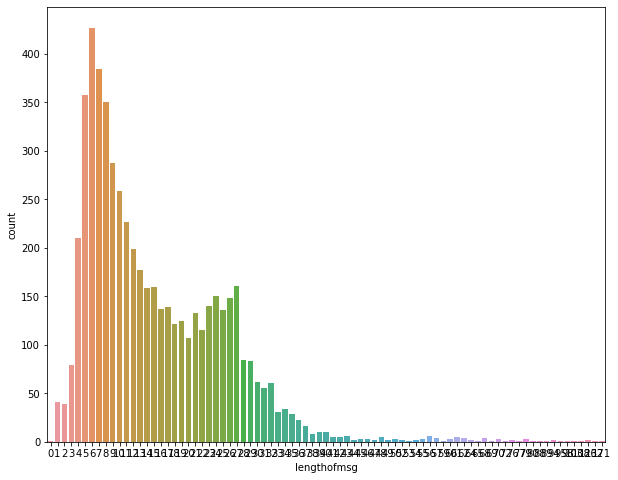

In [5]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['lengthofmsg'])

<AxesSubplot:xlabel='lengthofmsg', ylabel='count'>

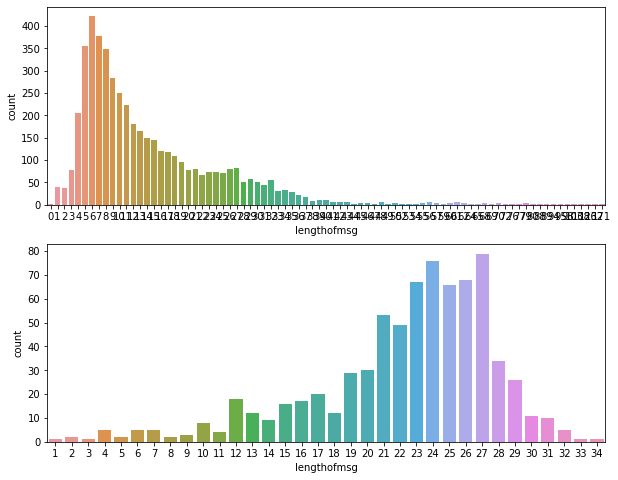

In [6]:
fig,axes = plt.subplots(2,figsize=(10,8))
sns.countplot(ax=axes[0],x=df[df['class']=='ham']['lengthofmsg'])
sns.countplot(ax=axes[1],x=df[df['class']=='spam']['lengthofmsg'])

In [7]:
from nltk.corpus import stopwords
stwords = stopwords.words('english')

In [8]:
def text_process(x):
    spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
    newx = [w for w in x if w not in spec_chars]
    newx = "".join(newx)
    new = [w for w in newx.split() if w.lower() not in stwords]
    return " ".join(np.unique(new))

In [9]:
df['sms'] = df['sms'].map(text_process)
df.head()

,class,sms,lengthofmsg
0,ham,amore available buffet bugis cine crazy e go g...,20
1,ham,joking lar ok oni u wif,6
2,spam,apply comp cup entry fa final free may overs q...,26
3,ham,already c dun early hor say u,11
4,ham,around dont goes lives nah think though usf,13


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['sms'],df['class'],test_size=0.2,random_state=101)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [14]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('counvec',CountVectorizer()),('tfidf',TfidfTransformer()),('model',MultinomialNB())])

In [15]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('counvec', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [16]:
pipe.score(x_test,y_test)

0.9560538116591928

In [17]:
from sklearn.metrics import classification_report
print(classification_report(pipe.predict(x_test),y_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1029
        spam       0.64      1.00      0.78        86

    accuracy                           0.96      1115
   macro avg       0.82      0.98      0.88      1115
weighted avg       0.97      0.96      0.96      1115

